In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp

# get data

In [2]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/stage=8+what=elaborated/',
)

In [3]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

'581a93929506b064'

In [4]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how does state interface complexity change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=num-less-fit-under-state-perturbation+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=num-less-fit-under-state-perturbation+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Num Less Fit Under State Perturbation'>

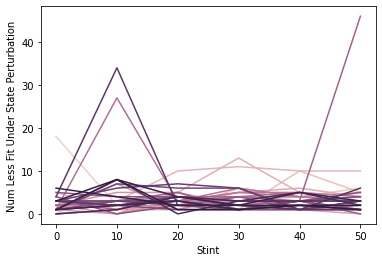

In [5]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Num Less Fit Under State Perturbation',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=num-less-fit-under-state-perturbation+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=num-less-fit-under-state-perturbation+_dfdigest=581a93929506b064+ext=.png


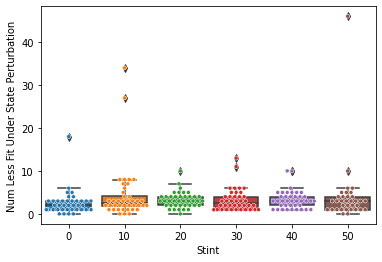

In [6]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Num Less Fit Under State Perturbation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does intra messaging complexity change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=num-less-fit-under-intra-self-send-filter-mod-20+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=num-less-fit-under-intra-self-send-filter-mod-20+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Num Less Fit Under Intra Self-Send @ Filter Mod 20'>

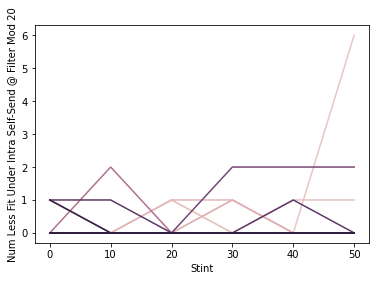

In [7]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Num Less Fit Under Intra Self-Send @ Filter Mod 20',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; y

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=num-less-fit-under-intra-self-send-filter-mod-20+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=num-less-fit-under-intra-self-send-filter-mod-20+_dfdigest=581a93929506b064+ext=.png


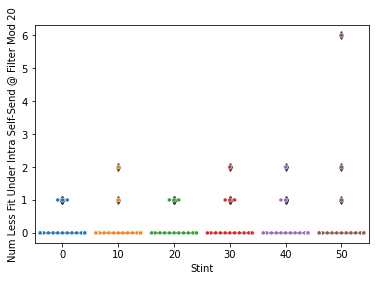

In [8]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Num Less Fit Under Intra Self-Send @ Filter Mod 20',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does inter messaging complexity change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=num-less-fit-under-inter-self-send-filter-mod-20+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=num-less-fit-under-inter-self-send-filter-mod-20+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Num Less Fit Under Inter Self-Send @ Filter Mod 20'>

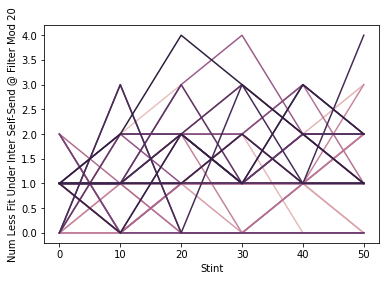

In [9]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Num Less Fit Under Inter Self-Send @ Filter Mod 20',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; y

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=num-less-fit-under-inter-self-send-filter-mod-20+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=num-less-fit-under-inter-self-send-filter-mod-20+_dfdigest=581a93929506b064+ext=.png


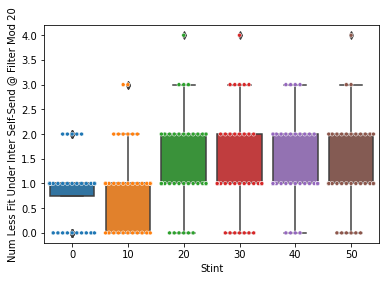

In [10]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Num Less Fit Under Inter Self-Send @ Filter Mod 20',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does cell interface complexity change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=cell-interface-complexity+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=cell-interface-complexity+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Cell Interface Complexity'>

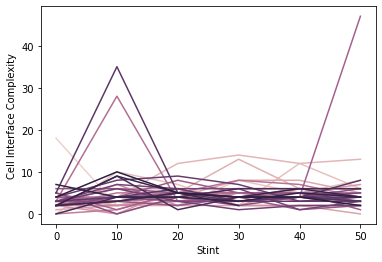

In [11]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Cell Interface Complexity',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=cell-interface-complexity+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=cell-interface-complexity+_dfdigest=581a93929506b064+ext=.png


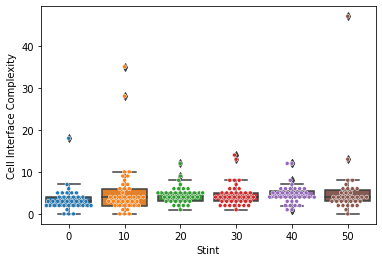

In [12]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Cell Interface Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=cell-interface-complexity+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=cell-interface-complexity+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Cell Interface Complexity'>

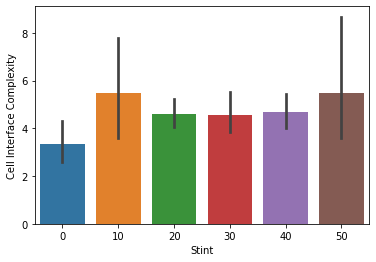

In [13]:
tp.tee(
    sns.barplot,
    data=df,
    x='Stint',
    y='Cell Interface Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does cardinal interface complexity change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=cardinal-interface-complexity+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=cardinal-interface-complexity+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Cardinal Interface Complexity'>

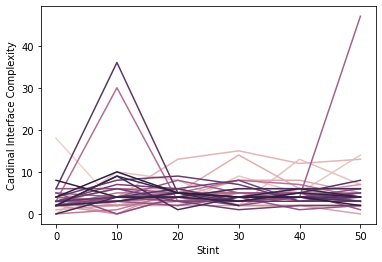

In [14]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Cardinal Interface Complexity',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=cardinal-interface-complexity+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=cardinal-interface-complexity+_dfdigest=581a93929506b064+ext=.png


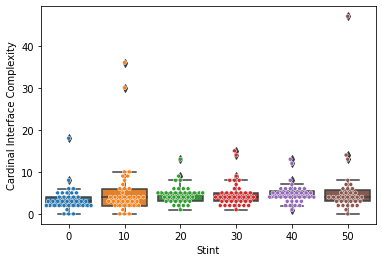

In [15]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Cardinal Interface Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=cardinal-interface-complexity+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=cardinal-interface-complexity+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Cardinal Interface Complexity'>

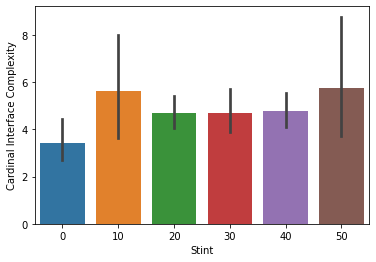

In [16]:
tp.tee(
    sns.barplot,
    data=df,
    x='Stint',
    y='Cardinal Interface Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)